<a href="https://colab.research.google.com/github/MuhammadRifatA/PCVK/blob/main/Week12PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

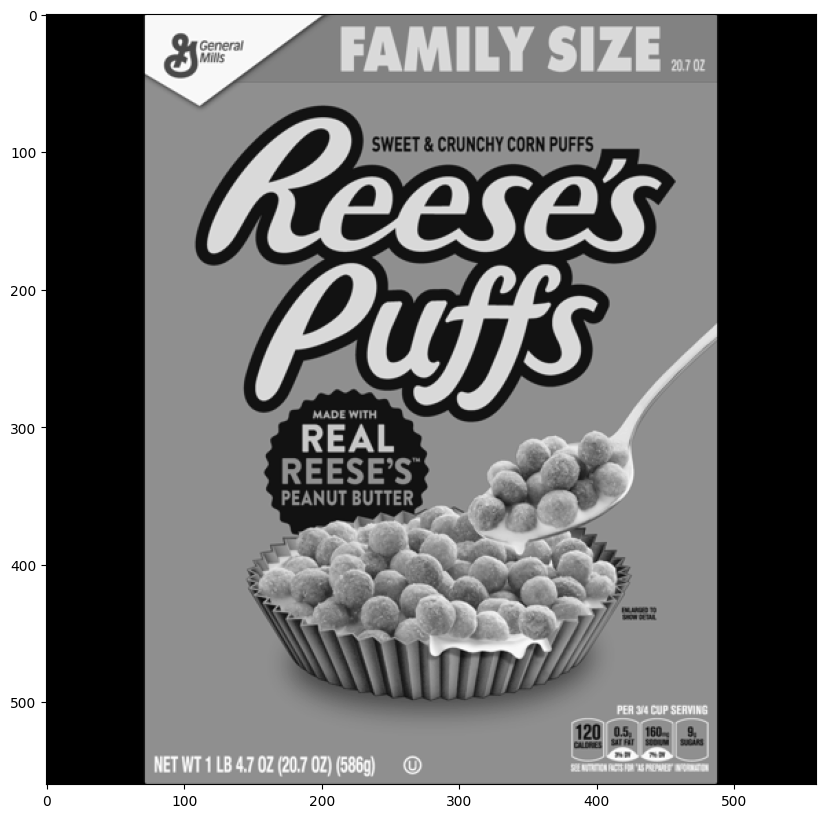

In [6]:
reeses = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/Week12/reeses_puffs.png',0)
display(reeses)

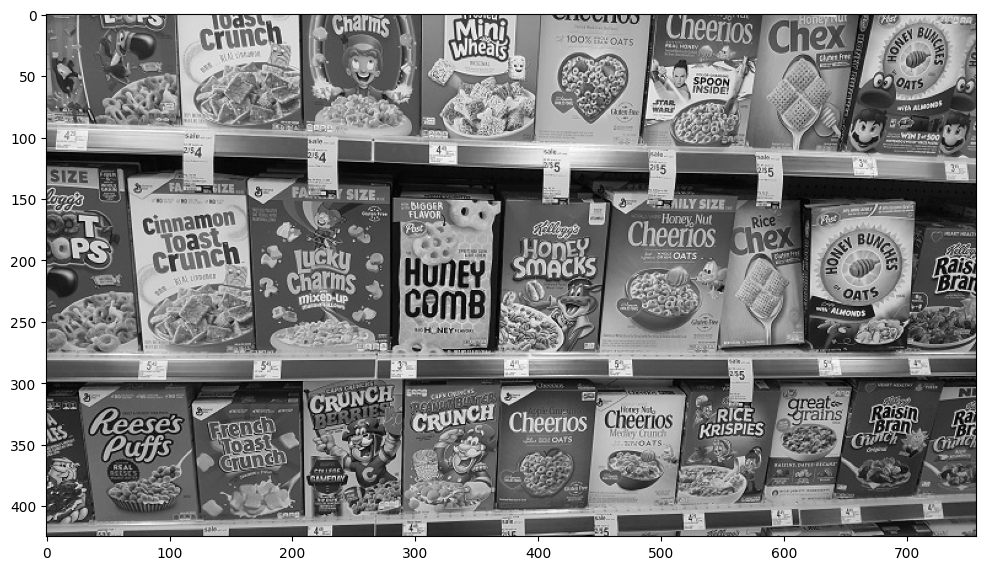

In [7]:
cereals = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/Week12/many_cereals.jpg',0)
display(cereals)

In [8]:
orb = cv.ORB_create()
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)
bf=cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
single_match=matches[0]
single_match.distance

71.0

In [9]:
len(matches)

139

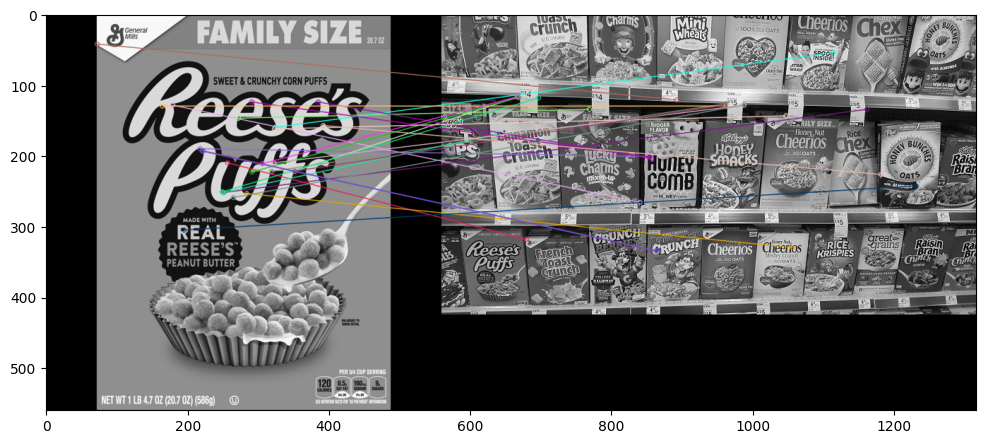

In [10]:
matches = sorted(matches, key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

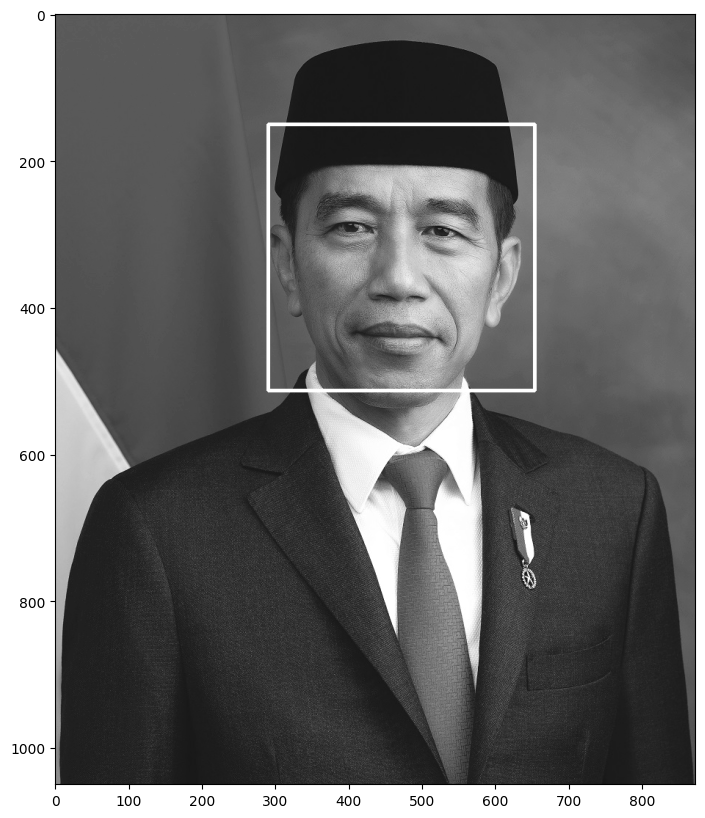

In [11]:
from google.colab.patches import cv2_imshow
ganteng = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_frontalface_alt.xml')

gantengjuga = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/Week12/jokowi.jpg',0)
gantenglah = ganteng.detectMultiScale(gantengjuga)
for(x,y,w,h) in gantenglah:
  cv.rectangle(gantengjuga, (x,y), (x+w, y+h), (255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(gantengjuga, cmap='gray')

In [12]:
def recognitions(pathArray, cascade_paths):
    for i, imagePath in enumerate(pathArray):
        normalImage = cv.imread(imagePath, 0)
        faci = cv.imread(imagePath, 0)

        img_height, img_width = normalImage.shape[:2]

        fig, axes = plt.subplots(1, len(cascade_paths) * 2, figsize=(img_width / 100, img_height / 100))  # Adjust scaling factor if needed

        for j, cascade_path in enumerate(cascade_paths):
            cascadi = cv.CascadeClassifier(cascade_path)

            roi_wajah = cascadi.detectMultiScale(normalImage, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Menampilkan normalImage di kolom pertama
            axes[j * 2].imshow(normalImage, cmap='gray')
            axes[j * 2].set_title(f'Normal Image, Cascade {j+1}')

            # Menampilkan faci dengan kotak bounding di wajah di kolom kedua
            for (x, y, w, h) in roi_wajah:
                cv.rectangle(faci, (x, y), (x + w, y + h), (0, 255, 0), 3)

            axes[j * 2 + 1].imshow(faci, cmap='gray')
            axes[j * 2 + 1].set_title(f'Faci Image, Cascade {j+1}')

        # Menampilkan plot
        plt.tight_layout()
        plt.show()

import os

In [13]:
path=['/content/drive/MyDrive/PCVK/Dataset/facedet/jokowi.jpg','/content/drive/MyDrive/PCVK/Dataset/facedet/kartini.jpg','/content/drive/MyDrive/PCVK/Dataset/facedet/mycat.jpg','/content/drive/MyDrive/PCVK/Dataset/facedet/mask.png','/content/drive/MyDrive/PCVK/Dataset/facedet/mjordan.jpg','/content/drive/MyDrive/PCVK/Dataset/facedet/solvayconf.jpg']
cascade=['/content/drive/MyDrive/PCVK/Dataset/haarcascades/haarcascade_frontalface_alt.xml']

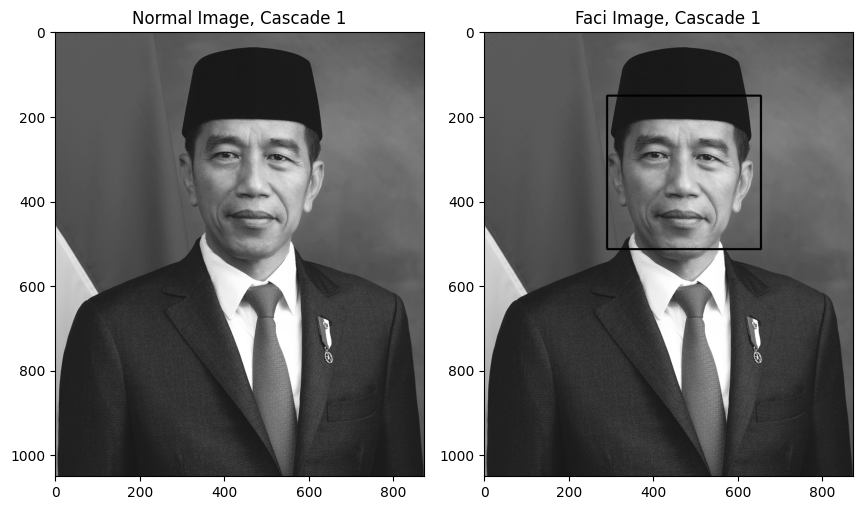

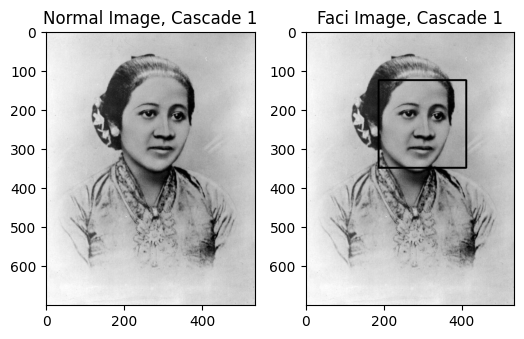

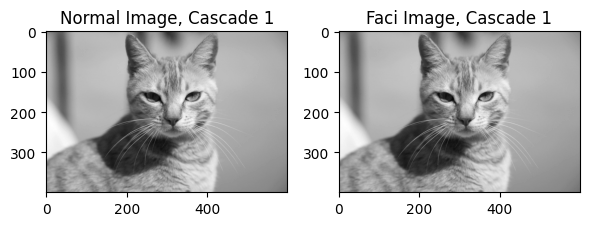

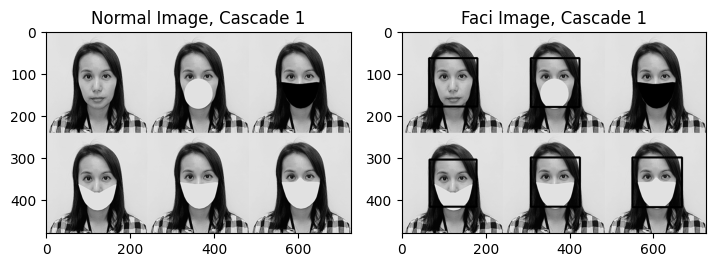

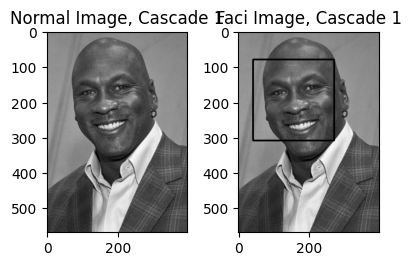

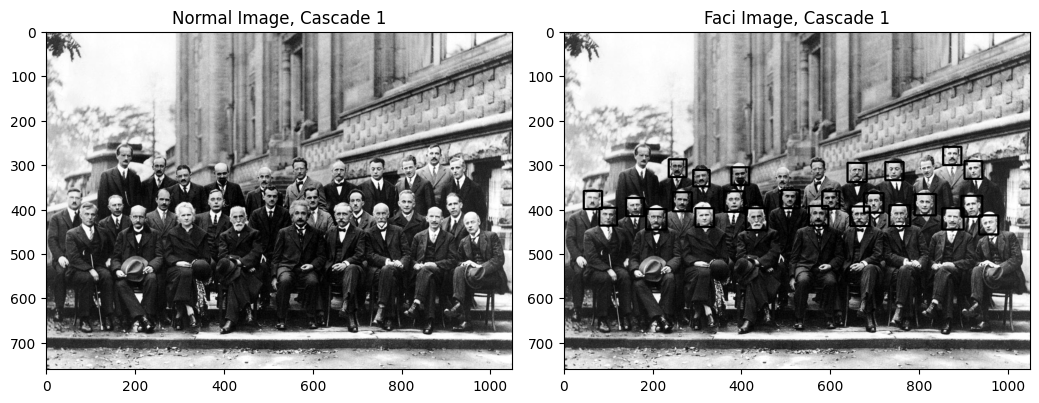

In [14]:
import os

path=['/content/drive/MyDrive/Kuliah/PCVK/Week12/jokowi.jpg','/content/drive/MyDrive/Kuliah/PCVK/Week12/kartini.jpg','/content/drive/MyDrive/Kuliah/PCVK/Week12/mycat.jpg','/content/drive/MyDrive/Kuliah/PCVK/Week12/mask.png','/content/drive/MyDrive/Kuliah/PCVK/Week12/mjordan.jpg','/content/drive/MyDrive/Kuliah/PCVK/Week12/solvayconf.jpg']
cascade=['/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_frontalface_alt.xml']

recognitions(path,cascade)

In [15]:
catPath=['/content/drive/MyDrive/Kuliah/PCVK/Week12/mycat.jpg']
cascadeCat=['/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_frontalcatface.xml']

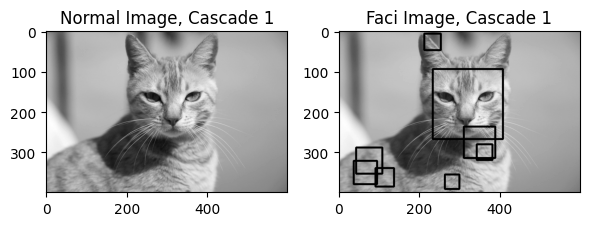

In [16]:
recognitions(catPath,cascadeCat)

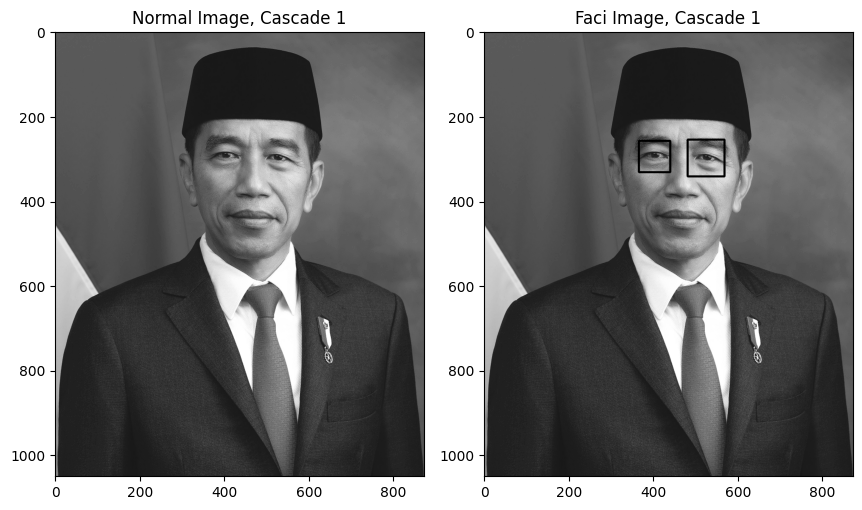

In [18]:
jokowi=['/content/drive/MyDrive/Kuliah/PCVK/Week12/jokowi.jpg']
eyeCascade=['/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_eye.xml']

recognitions(jokowi,eyeCascade)

In [20]:
# 5. Face tracking
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Dataset/haarcascades/haarcascade_frontalcatface.xml')
def take_photo(filename='zalna.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('Syafwan.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

NotReadableError: Could not start video source


<IPython.core.display.Javascript object>

MessageError: ignored

In [21]:
def overlay_faces(image_path, cascade_path, overlay_image_path):

    image = cv.imread(image_path)
    cascade = cv.CascadeClassifier(cascade_path)


    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


    faces = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


    overlay_image = cv.imread(overlay_image_path, cv.IMREAD_UNCHANGED)


    for (x, y, w, h) in faces:
        overlay = cv.resize(overlay_image, (w, h))
        image[y:y+h, x:x+w] = overlay[:, :, :3]

    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Result')
    plt.axis('off')
    plt.show()


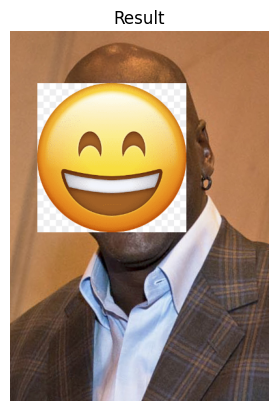

In [22]:
image_path = '/content/drive/MyDrive/Kuliah/PCVK/Week12/mjordan.jpg'
cascade_path = '/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_frontalface_alt.xml'
overlay_image_path = '/content/drive/MyDrive/Kuliah/PCVK/Week12/smile.png'

overlay_faces(image_path, cascade_path, overlay_image_path)

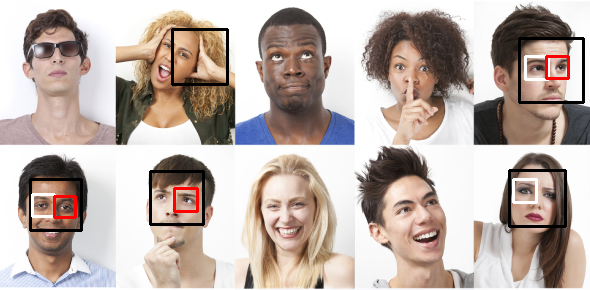

In [23]:
img_people = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/Week12/people.jpg')


face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_frontalcatface.xml')

eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Kuliah/PCVK/Week12/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img_people, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:

    cv2.rectangle(img_people, (x, y), (x+w, y+h), (0, 0, 0), 2)


    roi_gray = img_people[y:y+h, x:x+w]
    roi_color = img_people[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex, ey, ew, eh) in eyes:

        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 2)

        if ex + ew/2 > w/2:

            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)


cv2_imshow(img_people)

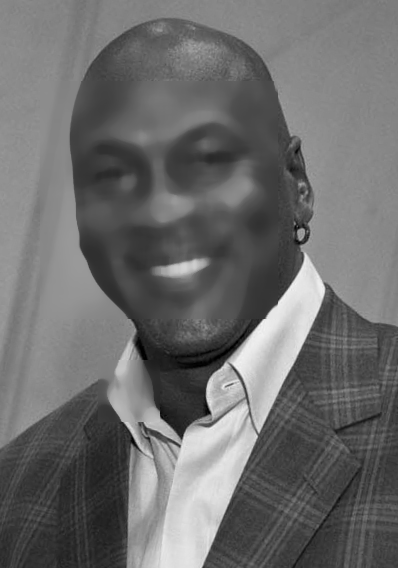

In [26]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Haarcascades face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image
image = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/Week12/mjordan.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Apply blurring to each detected face
for (x, y, w, h) in faces:
    # Extract the region of interest (ROI) for each face
    roi = gray[y:y+h, x:x+w]  # Use the grayscale image

    # Apply blurring using cv2.medianBlur
    blurred_roi = cv2.medianBlur(roi, 15)

    # Replace the original face with the blurred face
    gray[y:y+h, x:x+w] = blurred_roi

# Display the result using cv2_imshow
cv2_imshow(gray)

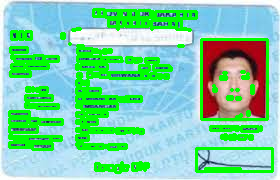

In [28]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
ktp_image = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/ktp2/download.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment characters
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and draw a bounding box around the characters
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(ktp_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the result using cv2_imshow
cv2_imshow(ktp_image)

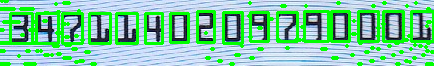

In [1]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
ktp_image = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/Week12/nik.png')

# Convert the image to grayscale
gray = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment characters
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour and draw a bounding box around the characters
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(ktp_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the result using cv2_imshow
cv2_imshow(ktp_image)

In [ ]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle
# Direktori data training
DATADIR = "dataset/training"
dirs = []
training_data = []
width, height = 100, 100
# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
 dirs.append(char_name)
# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
 path = os.path.join(DATADIR, char_name)
 class_number = dirs.index(char_name)
 for img in tqdm(os.listdir(path)):
 try:
 img_array = cv2.imread(os.path.join(data_dir_testing, car,
char_image), cv2.IMREAD_ANYCOLOR)
 new_array = cv2.resize(img_array, (width, height))
 training_data.append([new_array, class_number])
 except Exception as e:
 pass
random.shuffle(training_data)
X = []
Y = []
for feature, label in training_data:
 X.append(feature)
 Y.append(label)
X = np.array(X).reshape(-1, width, height, 1)
# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()